In [4]:
import matplotlib.pyplot as plt#
import numpy as np
import pandas as pd
import pooch

from fair import FAIR
from fair.interface import fill, initialise
from fair.io import read_properties

In [5]:
f = FAIR()

In [6]:
f.define_time(0, 1000, 1)
print(f.timebounds)
print(f.timepoints)

[   0.    1.    2. ...  998.  999. 1000.]
[5.000e-01 1.500e+00 2.500e+00 3.500e+00 4.500e+00 5.500e+00 6.500e+00
 7.500e+00 8.500e+00 9.500e+00 1.050e+01 1.150e+01 1.250e+01 1.350e+01
 1.450e+01 1.550e+01 1.650e+01 1.750e+01 1.850e+01 1.950e+01 2.050e+01
 2.150e+01 2.250e+01 2.350e+01 2.450e+01 2.550e+01 2.650e+01 2.750e+01
 2.850e+01 2.950e+01 3.050e+01 3.150e+01 3.250e+01 3.350e+01 3.450e+01
 3.550e+01 3.650e+01 3.750e+01 3.850e+01 3.950e+01 4.050e+01 4.150e+01
 4.250e+01 4.350e+01 4.450e+01 4.550e+01 4.650e+01 4.750e+01 4.850e+01
 4.950e+01 5.050e+01 5.150e+01 5.250e+01 5.350e+01 5.450e+01 5.550e+01
 5.650e+01 5.750e+01 5.850e+01 5.950e+01 6.050e+01 6.150e+01 6.250e+01
 6.350e+01 6.450e+01 6.550e+01 6.650e+01 6.750e+01 6.850e+01 6.950e+01
 7.050e+01 7.150e+01 7.250e+01 7.350e+01 7.450e+01 7.550e+01 7.650e+01
 7.750e+01 7.850e+01 7.950e+01 8.050e+01 8.150e+01 8.250e+01 8.350e+01
 8.450e+01 8.550e+01 8.650e+01 8.750e+01 8.850e+01 8.950e+01 9.050e+01
 9.150e+01 9.250e+01 9.350e+01 9.45

In [7]:
f.define_scenarios(["flat10", "pulse500","pulse1000","bell1000","gcb"])
f.scenarios

['flat10', 'pulse500', 'pulse1000', 'bell1000', 'gcb']

[0.20873014 0.25276203 0.30488921 0.3663328 0.43844296 0.52270172
 0.62072365 0.73425378 0.86516239 1.01543611 1.18716509 1.38252556
 1.6037577 1.8531385 2.13294934 2.44543847 2.79277839 3.17701853
 3.60003364 4.06346858 4.56868053 5.11667948 5.70806844 6.34298476
 7.0210441 7.74128883 8.50214249 9.30137222 10.1360608 11.0025899
 11.8966362 12.8131814 13.746537 14.6903849 15.6378333 16.5814888
 17.5135425 18.4258706 19.3101466 20.1579639 20.9609659 21.7109814
 22.400162 23.0211173 23.5670474 24.0318658 24.4103126 24.6980536
 24.8917628 24.9891865 24.9891865 24.8917628 24.6980536 24.4103126
 24.0318658 23.5670474 23.0211173 22.400162 21.7109814 20.9609659
 20.1579639 19.3101466 18.4258706 17.5135425 16.5814888 15.6378333
 14.6903849 13.746537 12.8131814 11.8966362 11.0025899 10.1360608
 9.30137222 8.50214249 7.74128883 7.0210441 6.34298476 5.70806844
 5.11667948 4.56868053 4.06346858 3.60003364 3.17701853 2.79277839
 2.44543847 2.13294934 1.8531385 1.6037577 1.38252556 1.18716509
 1.015

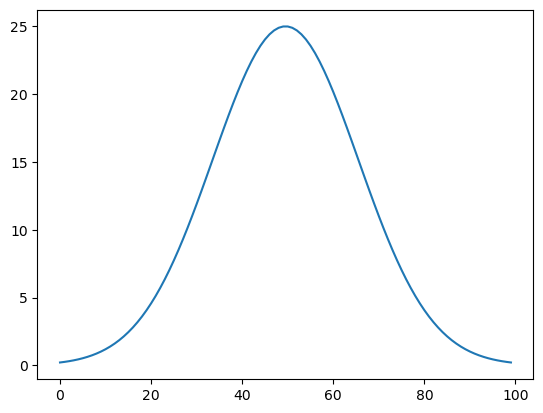

In [342]:
#this has the bell 1000 emissions
bell = pd.read_excel('data/gmd-12-4375-2019-t02.xlsx', header=0)
bell1000co2=bell['B1.'].values[1:]
print(bell['B1.'].values[1:])
plt.plot(bell1000co2)
print(np.sum(bell1000co2))

     Year  fossil emissions excluding carbonation  land-use change emissions  \
0    1750                                0.002540                        NaN   
1    1751                                0.002567                        NaN   
2    1752                                0.002594                        NaN   
3    1753                                0.002623                        NaN   
4    1754                                0.002657                        NaN   
..    ...                                     ...                        ...   
268  2018                               10.034647                   1.169527   
269  2019                               10.109199                   1.254780   
270  2020                                9.554514                   1.172267   
271  2021                               10.048183                   1.179470   
272  2022                               10.139133                   1.176297   

     atmospheric growth  ocean sink  la

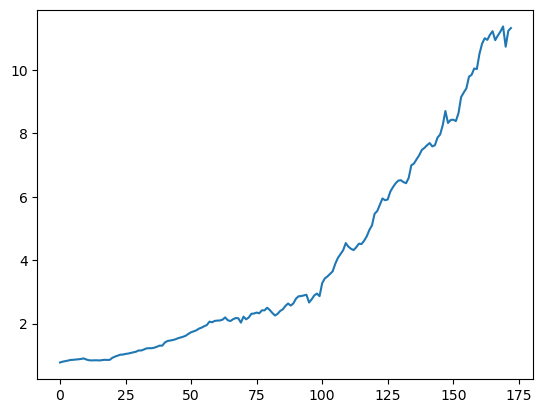

In [343]:
#newest global carbon budget database
gcbco2=pd.read_excel('data/Global_Carbon_Budget_2023v1.0.xlsx',sheet_name=2,header=15)
print(gcbco2)
gcbco2foss=gcbco2['fossil emissions excluding carbonation'].values[100:]
gcbco2land=gcbco2['land-use change emissions'].values[100:]
print(gcbco2['fossil emissions excluding carbonation'].values[100:])
print(gcbco2['land-use change emissions'].values[100:])
plt.plot(gcbco2foss+gcbco2land)
print(np.sum(gcbco2foss+gcbco2land))
print(np.shape(gcbco2foss+gcbco2land))

In [344]:
#I downloaded this locally so I wouldn't have to connect to the internet to get the data
df_configs = pd.read_csv("data/calibrated_constrained_parameters.csv",index_col=0)#fair_params_1_2_0_obj, index_col=0)
configs = df_configs.index  # this is used as a label for the "config" axis
f.define_configs(configs)

In [1]:
configs

NameError: name 'configs' is not defined

In [ ]:
species = ['CO2 FFI', 'CO2 AFOLU','CO2','CH4','N2O']

In [2]:
properties = {
    'CO2 FFI': {
        'type': 'co2 ffi',
        'input_mode': 'emissions',
        'greenhouse_gas': False,  # it doesn't behave as a GHG itself in the model, but as a precursor
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False,
    },
    'CO2 AFOLU': {
        'type': 'co2 afolu',
        'input_mode': 'emissions',
        'greenhouse_gas': False,  # it doesn't behave as a GHG itself in the model, but as a precursor
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False,
    },
    'CO2': {
        'type': 'co2',
        'input_mode': 'calculated',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False,
    },
    'CH4': {
        'type': 'ch4',
        'input_mode': 'concentration',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False, # we don't treat methane as a reactive gas
    },
    'N2O': {
        'type': 'n2o',
        'input_mode': 'concentration',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False, # we don't treat nitrous oxide as a reactive gas
    }
}

In [348]:
f.define_species(species, properties)

In [349]:
f.properties

{'CO2 FFI': {'type': 'co2 ffi',
  'input_mode': 'emissions',
  'greenhouse_gas': False,
  'aerosol_chemistry_from_emissions': False,
  'aerosol_chemistry_from_concentration': False},
 'CO2 AFOLU': {'type': 'co2 afolu',
  'input_mode': 'emissions',
  'greenhouse_gas': False,
  'aerosol_chemistry_from_emissions': False,
  'aerosol_chemistry_from_concentration': False},
 'CO2': {'type': 'co2',
  'input_mode': 'calculated',
  'greenhouse_gas': True,
  'aerosol_chemistry_from_emissions': False,
  'aerosol_chemistry_from_concentration': False},
 'CH4': {'type': 'ch4',
  'input_mode': 'concentration',
  'greenhouse_gas': True,
  'aerosol_chemistry_from_emissions': False,
  'aerosol_chemistry_from_concentration': False},
 'N2O': {'type': 'n2o',
  'input_mode': 'concentration',
  'greenhouse_gas': True,
  'aerosol_chemistry_from_emissions': False,
  'aerosol_chemistry_from_concentration': False}}

In [350]:
help(f)

Help on FAIR in module fair.fair object:

class FAIR(builtins.object)
 |  FAIR(n_gasboxes=4, n_layers=3, iirf_max=100, br_cl_ods_potential=45, ghg_method='meinshausen2020', ch4_method='leach2021', temperature_prescribed=False)
 |  
 |  Initialise FaIR.
 |  
 |  Parameters
 |  ----------
 |  n_gasboxes : int
 |      the number of atmospheric greenhouse gas boxes to run the model with
 |  n_layers : int
 |      the number of ocean layers in the energy balance or impulse
 |      response model to run with
 |  iirf_max : float
 |      limit for time-integral of greenhouse gas impulse response function.
 |  br_cl_ods_potential : float
 |      factor describing the ratio of efficiency that each bromine atom
 |      has as an ozone depleting substance relative to each chlorine atom.
 |  ghg_method : str
 |      method to use for calculating greenhouse gas forcing from CO\ :sub:`2`,
 |      CH\ :sub:`4` and N\ :sub:`2`\ O. Valid options are {"leach2021",
 |      "meinshausen2020", "etminan2016

In [351]:
f.allocate()

In [352]:
f.emissions

<xarray.DataArray (timepoints: 1000, scenario: 5, config: 1001, specie: 5)>
array([[[[nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan]],

        [[nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan]],

        [[nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan]],

        [[nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan]],

        [[nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan]]]])
Coordinates:
  * timepoints  (timepoints) float64 0.5 1.5 2.5 3.5 ... 996.5 997.5 998.5 999.5
  * scenario    (scenario) <U9 'flat10' 'pulse500' 'pulse1000' 'bell1000' 'gcb'
  * config      (config) int64 1230 1715 2658 3898 ... 1497041 1497105 1498424
  * specie      (specie) <U9 'CO2 FFI' 'CO2 AFOLU' 'CO2' 'CH4' 'N2O'

In [353]:
#Set emissions to zero everywhere first
f.emissions.loc[(dict(specie="CO2 FFI", scenario="flat10"))] = 0.0
f.emissions.loc[(dict(specie="CO2 FFI", scenario="pulse500"))] = 0.0
f.emissions.loc[(dict(specie="CO2 FFI", scenario="pulse1000"))] = 0.0
f.emissions.loc[(dict(specie="CO2 FFI", scenario="bell1000"))] = 0.0
f.emissions.loc[(dict(specie="CO2 FFI", scenario="gcb"))] = 0.0
f.emissions.loc[(dict(specie="CO2 AFOLU"))] = 0.0
#scenario 0 is flat10, multiply by 3.664 to get into CO2 units
f.emissions[0:100,0,:,0] = 10.0*3.664
#scenario 1 is pulse500
f.emissions[0,1,:,0] = 500.0*3.664
#scenario 2 is pulse1000
f.emissions[0,2,:,0] = 1000.0*3.664
#scenario 3 is bell1000
for i in range(100): 
    f.emissions[i,3,:,0] = 3.664*bell1000co2[i]
#scenario 4 is gcb
for i in range(173): 
    f.emissions[i,4,:,0] = 3.664*(gcbco2foss[i]+gcbco2land[i])


In [354]:
fill(f.climate_configs["ocean_heat_capacity"], df_configs.loc[:, "clim_c1":"clim_c3"].values)
fill(
    f.climate_configs["ocean_heat_transfer"],
    df_configs.loc[:, "clim_kappa1":"clim_kappa3"].values,
)
fill(f.climate_configs["deep_ocean_efficacy"], df_configs["clim_epsilon"].values.squeeze())
fill(f.climate_configs["gamma_autocorrelation"], df_configs["clim_gamma"].values.squeeze())
fill(f.climate_configs["sigma_eta"], df_configs["clim_sigma_eta"].values.squeeze())
fill(f.climate_configs["sigma_xi"], df_configs["clim_sigma_xi"].values.squeeze())
fill(f.climate_configs["seed"], df_configs["seed"])
#I changed this to false bc no randomness seems better
fill(f.climate_configs["stochastic_run"], False)#True)
fill(f.climate_configs["use_seed"], True)
fill(f.climate_configs["forcing_4co2"], df_configs["clim_F_4xCO2"])

In [355]:
f.fill_species_configs(filename='data/species_configs_properties_calibration1.2.0.csv')
# carbon cycle
fill(f.species_configs["iirf_0"], df_configs["cc_r0"].values.squeeze(), specie="CO2")
fill(f.species_configs["iirf_airborne"], df_configs["cc_rA"].values.squeeze(), specie="CO2")
fill(f.species_configs["iirf_uptake"], df_configs["cc_rU"].values.squeeze(), specie="CO2")
fill(f.species_configs["iirf_temperature"], df_configs["cc_rT"].values.squeeze(), specie="CO2")
fill(f.species_configs["forcing_scale"], df_configs[f"fscale_CO2"].values.squeeze(), specie="CO2")
fill(f.species_configs["baseline_concentration"], df_configs["cc_co2_concentration_1750"].values.squeeze(), specie="CO2")


In [437]:
f.species_configs

<xarray.Dataset>
Dimensions:                                   (config: 1001, specie: 5,
                                               gasbox: 4)
Coordinates:
  * config                                    (config) int64 1230 ... 1498424
  * specie                                    (specie) <U9 'CO2 FFI' ... 'N2O'
  * gasbox                                    (gasbox) int64 0 1 2 3
Data variables: (12/31)
    tropospheric_adjustment                   (config, specie) float64 0.0 .....
    forcing_efficacy                          (config, specie) float64 1.0 .....
    forcing_temperature_feedback              (config, specie) float64 0.0 .....
    forcing_scale                             (config, specie) float64 1.0 .....
    partition_fraction                        (config, specie, gasbox) float64 ...
    unperturbed_lifetime                      (config, specie, gasbox) float64 ...
    ...                                        ...
    aci_shape                                 (config, specie) float64 0.0 .....
    cl_atoms                                  (specie) float64 nan nan ... 0.0
    br_atoms                                  (specie) float64 nan nan ... 0.0
    fractional_release                        (config, specie) float64 nan .....
    ch4_lifetime_chemical_sensitivity         (config, specie) float64 0.0 .....
    lifetime_temperature_sensitivity          (config) float64 -0.0408 ... -0...

In [356]:
initialise(f.concentration, f.species_configs["baseline_concentration"])
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.cumulative_emissions, 0)
initialise(f.airborne_emissions, 0)
#preindustrial CH4 and N2O at all times
f.concentration.loc[(dict(specie='CH4'))] = 729.2
f.concentration.loc[(dict(specie='N2O'))] = 270.1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


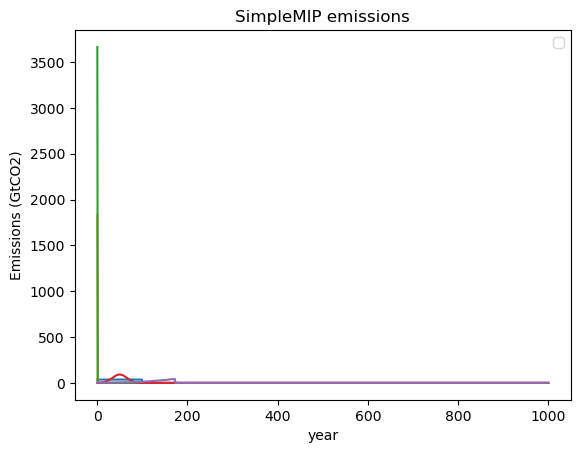

In [357]:
pl.plot(f.timepoints, f.emissions.loc[dict(config=1230,specie="CO2 FFI")])
pl.title('SimpleMIP emissions')
pl.xlabel('year')
pl.ylabel('Emissions (GtCO2)')
pl.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


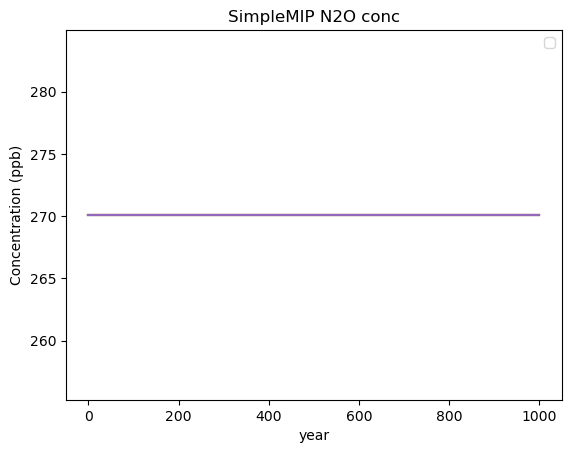

In [457]:
pl.plot(f.timebounds, f.concentration.loc[dict(config=1230,specie="N2O")])
pl.title('SimpleMIP N2O conc')
pl.xlabel('year')
pl.ylabel('Concentration (ppb)')
pl.legend()

In [359]:
f.run()

Running 5005 projections in parallel: 100%|█| 1000/1000 [00:10<00:00, 91.16times


In [360]:
f.concentration

<xarray.DataArray (timebounds: 1001, scenario: 5, config: 1001, specie: 5)>
array([[[[         nan,          nan, 277.62545011, 729.2       ,
          270.1       ],
         [         nan,          nan, 279.90913992, 729.2       ,
          270.1       ],
         [         nan,          nan, 276.85802526, 729.2       ,
          270.1       ],
         ...,
         [         nan,          nan, 276.88099111, 729.2       ,
          270.1       ],
         [         nan,          nan, 277.9147795 , 729.2       ,
          270.1       ],
         [         nan,          nan, 279.60005188, 729.2       ,
          270.1       ]],

        [[         nan,          nan, 277.62545011, 729.2       ,
          270.1       ],
         [         nan,          nan, 279.90913992, 729.2       ,
          270.1       ],
         [         nan,          nan, 276.85802526, 729.2       ,
          270.1       ],
...
         [         nan,          nan, 400.423927  , 729.2       ,
          270.1       ],
         [         nan,          nan, 385.0687494 , 729.2       ,
          270.1       ],
         [         nan,          nan, 385.19571557, 729.2       ,
          270.1       ]],

        [[         nan,          nan, 350.14923936, 729.2       ,
          270.1       ],
         [         nan,          nan, 351.9471653 , 729.2       ,
          270.1       ],
         [         nan,          nan, 350.77627104, 729.2       ,
          270.1       ],
         ...,
         [         nan,          nan, 353.05493528, 729.2       ,
          270.1       ],
         [         nan,          nan, 350.29406372, 729.2       ,
          270.1       ],
         [         nan,          nan, 351.86763695, 729.2       ,
          270.1       ]]]])
Coordinates:
  * timebounds  (timebounds) float64 0.0 1.0 2.0 3.0 ... 997.0 998.0 999.0 1e+03
  * scenario    (scenario) <U9 'flat10' 'pulse500' 'pulse1000' 'bell1000' 'gcb'
  * config      (config) int64 1230 1715 2658 3898 ... 1497041 1497105 1498424
  * specie      (specie) <U9 'CO2 FFI' 'CO2 AFOLU' 'CO2' 'CH4' 'N2O'

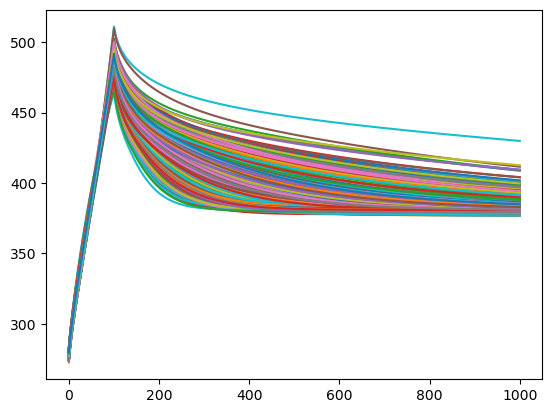

In [361]:
plt.plot(f.concentration.loc[(dict(specie="CO2",scenario="flat10"))]);

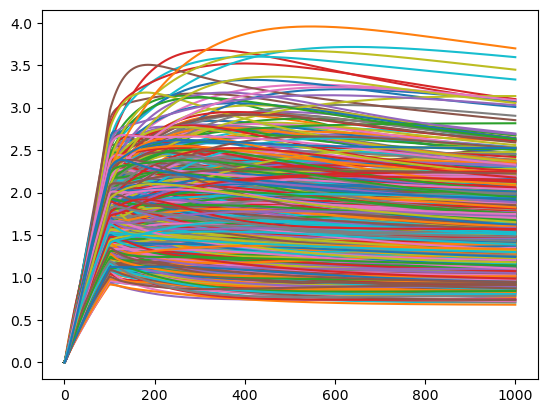

In [362]:
plt.plot(f.temperature.loc[dict(layer=0,scenario="flat10")]);

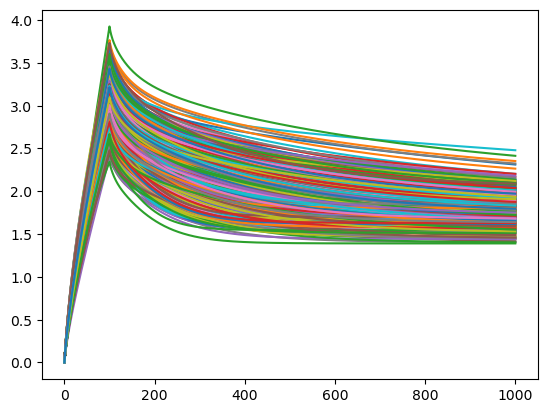

In [363]:
plt.plot(f.forcing.loc[(dict(specie="CO2",scenario="flat10"))]);

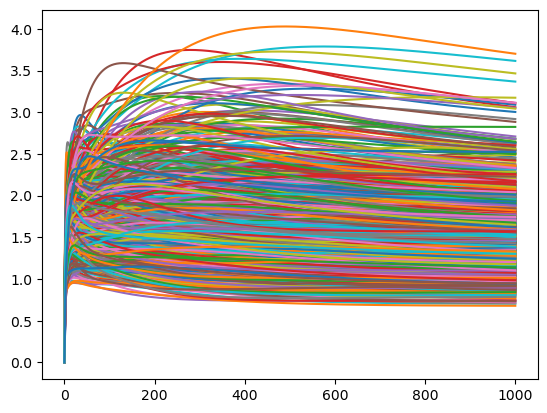

In [364]:
plt.plot(f.temperature.loc[dict(scenario="pulse1000",layer=0)]);

In [365]:
fancy_titles = {
#    "ssp119": "SSP1-1.9",
#    "ssp126": "SSP1-2.6",
    "flat10": "Flat10",
    "pulse500": "Pulse 500 GtC",
    "pulse1000": "Pulse 1000 GtC",
    "bell1000": "Bell 1000 GtC",
    "gcb": "Global Carbon Budget",
#    "ssp460": "SSP4-6.0",
#    "ssp534-over": "SSP5-3.4-overshoot",
#    "ssp585": "SSP5-8.5",
}

ar6_colors = {
#    "ssp119": "#00a9cf",
#    "ssp126": "#003466",
    "flat10": "#f69320",
    "pulse500": "#df0000",
    "pulse1000": "#2274ae",
    "bell1000": "#b0724e",
#    "ssp534-over": "#92397a",
    "gcb": "#980002",
}

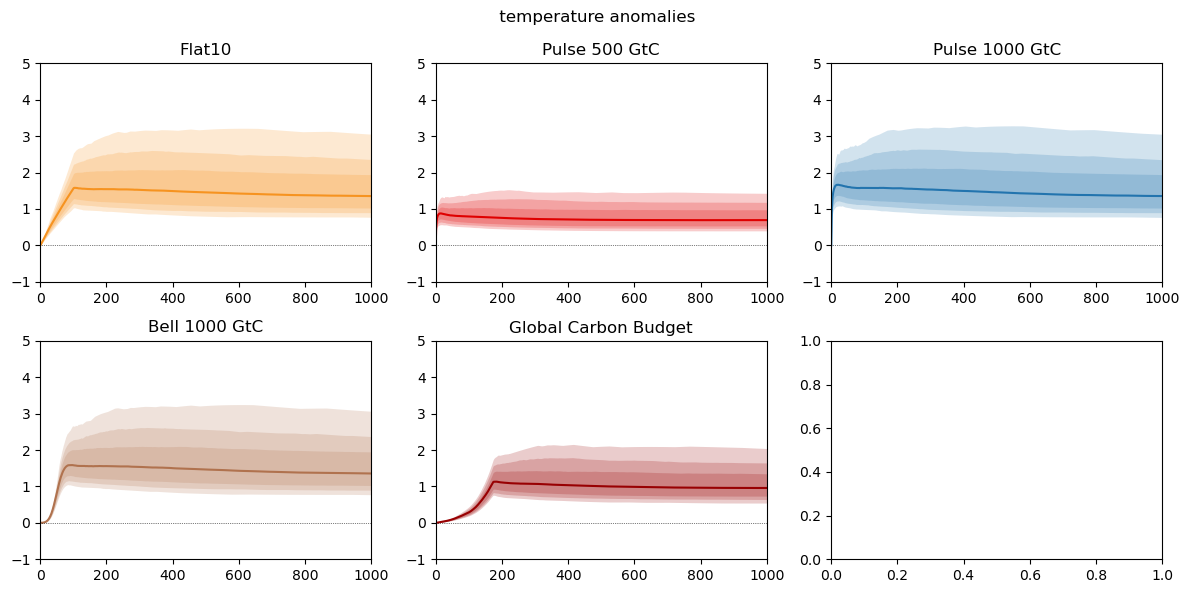

In [366]:
fig, ax = pl.subplots(2, 3, figsize=(12, 6))

for i, scenario in enumerate(f.scenarios):
    for pp in ((1, 99), (5, 95), (16, 84)):
        ax[i // 3, i % 3].fill_between(
            f.timebounds,
            np.percentile(
                f.temperature.loc[dict(scenario=scenario, layer=0)],
                # - np.average(
                #     f.temperature.loc[
                #         dict(scenario=scenario, timebounds=np.arange(0, 1000), layer=0)
                #     ],
                #     weights=weights_51yr,
                #     axis=0
                # ),
                pp[0],
                axis=1,
            ),
            np.percentile(
                f.temperature.loc[dict(scenario=scenario, layer=0)],
                # - np.average(
                #     f.temperature.loc[
                #         dict(scenario=scenario, timebounds=np.arange(0, 1000), layer=0)
                #     ],
                #     weights=weights_51yr,
                #     axis=0
                # ),
                pp[1],
                axis=1,
            ),
            color=ar6_colors[f.scenarios[i]],
            alpha=0.2,
            lw=0
        )

    ax[i // 3, i % 3].plot(
        f.timebounds,
        np.median(
            f.temperature.loc[dict(scenario=scenario, layer=0)],
            # - np.average(
            #     f.temperature.loc[
            #         dict(scenario=scenario, timebounds=np.arange(0, 1000), layer=0)
            #     ],
            #     weights=weights_51yr,
            #     axis=0
            # ),
            axis=1,
        ),
        color=ar6_colors[f.scenarios[i]],
    )
#     ax[i // 3, i % 3].plot(np.arange(1850.5, 2021), gmst, color="k")
    ax[i // 3, i % 3].set_xlim(0, 1000)
    ax[i // 3, i % 3].set_ylim(-1, 5)
    ax[i // 3, i % 3].axhline(0, color="k", ls=":", lw=0.5)
    ax[i // 3, i % 3].set_title(fancy_titles[f.scenarios[i]])

pl.suptitle(" temperature anomalies")
fig.tight_layout()

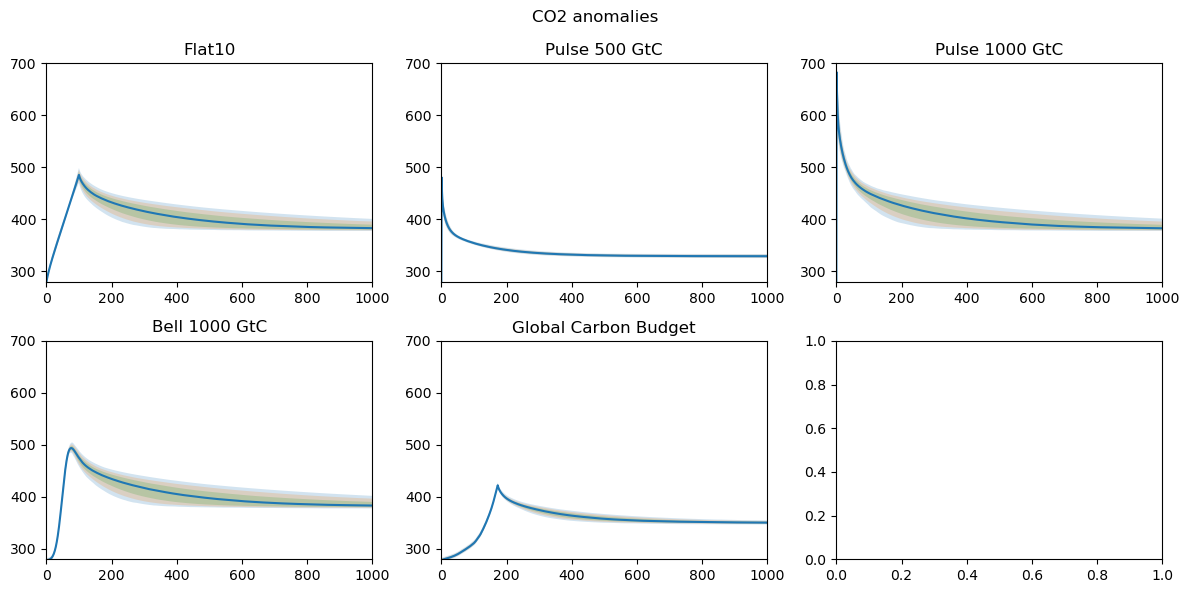

In [459]:
fig, ax = pl.subplots(2, 3, figsize=(12, 6))

for i, scenario in enumerate(f.scenarios):
    for pp in ((1, 99), (5, 95), (16, 84)):
        ax[i // 3, i % 3].fill_between(
            f.timebounds,
            np.percentile(
                f.concentration.loc[dict(scenario=scenario, specie="CO2")],
                pp[0],
                axis=1,
            ),
            np.percentile(
                f.concentration.loc[dict(scenario=scenario, specie="CO2")],
                pp[1],
                axis=1,
            ),
            alpha=0.2,
            lw=0
        )

    ax[i // 3, i % 3].plot(
        f.timebounds,
        np.median(
            f.concentration.loc[dict(scenario=scenario, specie="CO2")],
            axis=1,
        ),
    )
    ax[i // 3, i % 3].set_xlim(0, 1000)
    ax[i // 3, i % 3].set_ylim(280, 700)
    ax[i // 3, i % 3].axhline(0, color="k", ls=":", lw=0.5)
    ax[i // 3, i % 3].set_title(fancy_titles[f.scenarios[i]])

pl.suptitle("CO2 anomalies")
fig.tight_layout()

In [293]:
f.concentration.loc[dict(scenario=scenario, specie="CO2")]

<xarray.DataArray (timebounds: 1001, config: 1001)>
array([[277.62545011, 279.90913992, 276.85802526, ..., 276.88099111,
        277.9147795 , 279.60005188],
       [277.62545011, 279.90913992, 276.85802526, ..., 276.88099111,
        277.9147795 , 279.60005188],
       [277.62545011, 279.90913992, 276.85802526, ..., 276.88099111,
        277.9147795 , 279.60005188],
       ...,
       [277.62545011, 279.90913992, 276.85802526, ..., 276.88099111,
        277.9147795 , 279.60005188],
       [277.62545011, 279.90913992, 276.85802526, ..., 276.88099111,
        277.9147795 , 279.60005188],
       [277.62545011, 279.90913992, 276.85802526, ..., 276.88099111,
        277.9147795 , 279.60005188]])
Coordinates:
  * timebounds  (timebounds) float64 0.0 1.0 2.0 3.0 ... 997.0 998.0 999.0 1e+03
    scenario    <U9 'gcb'
  * config      (config) int64 1230 1715 2658 3898 ... 1497041 1497105 1498424
    specie      <U9 'CO2'

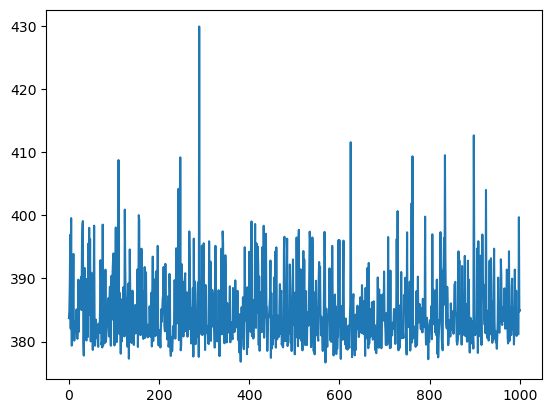

In [289]:
plt.plot(f.concentration.loc[dict(scenario="flat10", specie="CO2")][-1])
#this is across ensembe members after 1000 years -- it's interesting to see that lower bound

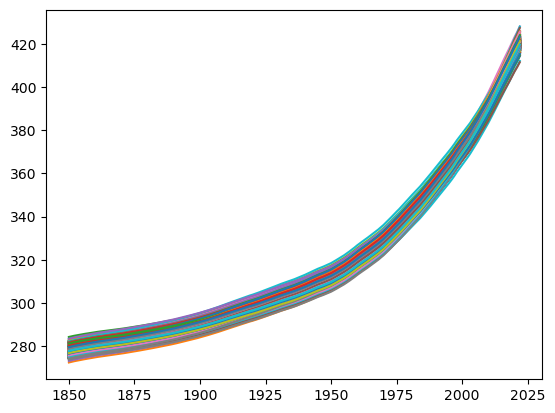

In [460]:
#the GCB scneario from 1850 to 2023
plt.plot(range(1850,2023),f.concentration.loc[dict(scenario="gcb", specie="CO2")][:173]);
#The CO2 concentrations start at different numbers -- this is one of the initial random parameters. we should maybe change this to a constant!

<ErrorbarContainer object of 3 artists>

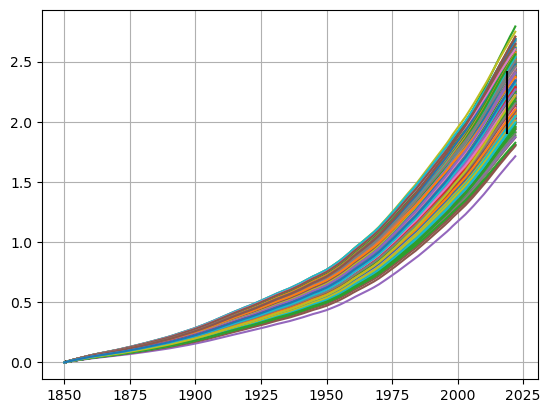

In [387]:
plt.plot(range(1850,2023),f.forcing.loc[dict(scenario="gcb", specie="CO2")][:173]);plt.grid();
#IPCC range of CO2 forcing in 2019
plt.errorbar(2019,2.16,yerr=.26,color='k')

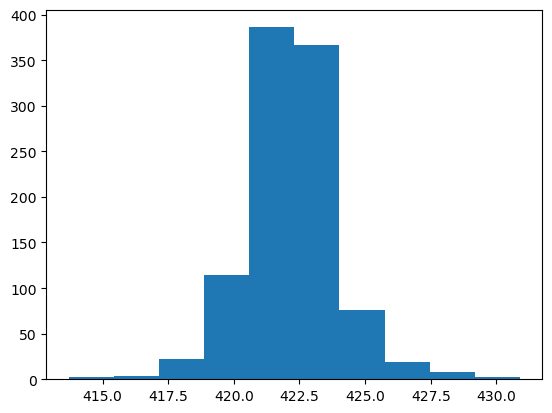

In [392]:
plt.hist(f.concentration.loc[dict(scenario="gcb", specie="CO2")][173]);
#CO2 in 2022 is a little high

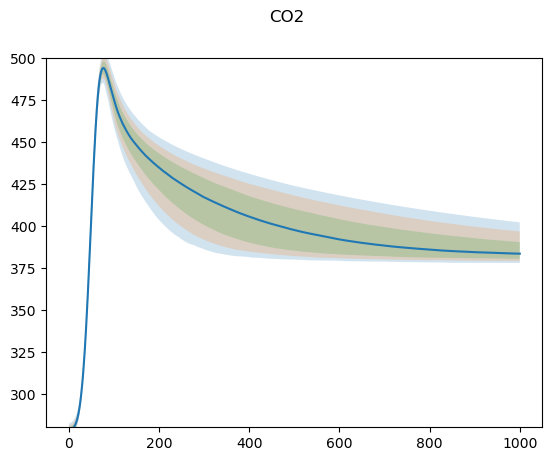

In [405]:
scenario = 'bell1000'
for pp in ((1, 99), (5, 95), (16, 84)):
    plt.fill_between(
            f.timebounds,
            np.percentile(
                f.concentration.loc[dict(scenario=scenario, specie="CO2")],
                pp[0],
                axis=1,
            ),
            np.percentile(
                f.concentration.loc[dict(scenario=scenario, specie="CO2")],
                pp[1],
                axis=1,
            ),
            alpha=0.2,
            lw=0
        )
plt.plot(
    f.timebounds,
    np.median(
        f.concentration.loc[dict(scenario=scenario, specie="CO2")],
        axis=1,
    ),
)
#plt.set_xlim(0, 1000)
plt.ylim(280, 500)
plt.axhline(0, color="k", ls=":", lw=0.5)
#    ax[i // 3, i % 3].set_title(fancy_titles[scenarios[i]])

pl.suptitle("CO2")
fig.tight_layout()
#it's kind of interesting how positively skewed the distribution is at the beginning. i guess a lot of the carbon is only left in the 
#infinity box at the end

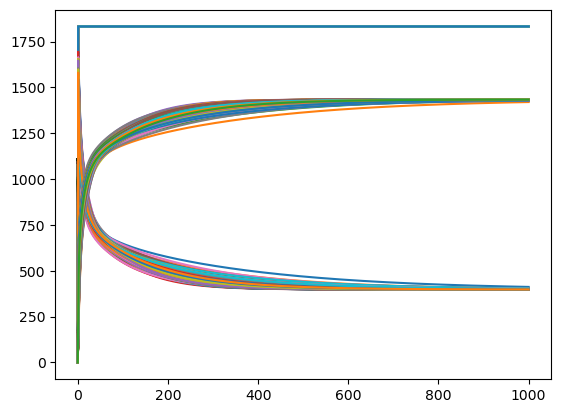

In [423]:
#to start thinking about carbon cycle parameters, look at cumulative emissions, airborne, and what goes into sinks
scenario = 'pulse500'
plt.plot(f.cumulative_emissions.loc[dict(scenario=scenario,specie="CO2 FFI")]);
plt.plot(f.airborne_emissions.loc[dict(scenario=scenario,specie="CO2")]);
plt.plot(f.cumulative_emissions.loc[dict(scenario=scenario,specie="CO2 FFI")]-f.airborne_emissions.loc[dict(scenario=scenario,specie="CO2")]);
#plt.plot(f.airborne_fraction.loc[dict(scenario=scenario,specie="CO2")]);


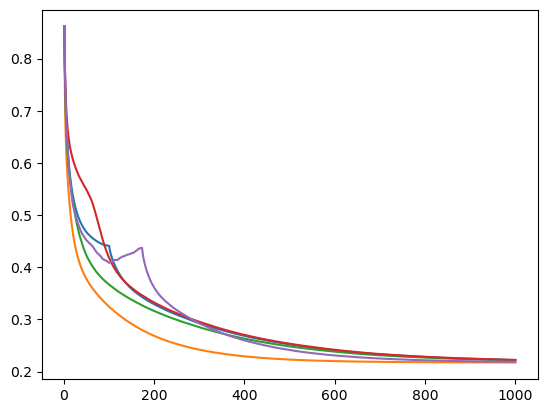

In [434]:
for scenario in f.scenarios: 
    plt.plot(np.median(f.airborne_fraction.loc[dict(scenario=scenario,specie="CO2")],axis=1));

In [ ]:
#starting to write code that has the iirf function components calculated, in iirf = iirf0 + iirf_airborne * airborne_emissions + iirf_c*uptake + iirf_T*Temperature
iirf0 = np.zeros((1001,1001))
iirfa = np.zeros((1001,1001))
for i in range(1001): 
    iirf0[i,:] = f.species_configs.iirf_0.loc[dict(specie="CO2")][i]
    for j in range(1001): 
        iirfa[i,j] = f.airborne_emissions.loc[dict(scenario=scenario,specie="CO2")][i,j]*f.species_configs.iirf_airborne.loc[dict(specie="CO2")][i]
        

In [ ]:
#plt.plot(f.species_configs.iirf_0.loc[dict(specie="CO2")]+ f.airborne_emissions.loc[dict(scenario=scenario,specie="CO2")]*f.species_configs.iirf_airborne.loc[dict(specie="CO2")]+ uptake*iirf_uptake + temperature*iirf_temperature;
plt.plot(iirf0.T+iirfa.T);
